In [72]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from PIL import Image
import random
import cv2

In [73]:
df = pd.read_csv('data/train.csv')

In [74]:
image = np.asarray(df['Pixels'])
label = np.asarray(df['Emotion'])

## Data Preprocessing

In [75]:
data = []
for i in range(np.shape(image)[0]):
    im = image[i]
    im = im.split(' ')
    im = np.asarray(im)
    data.append(im.reshape(48, 48))

3


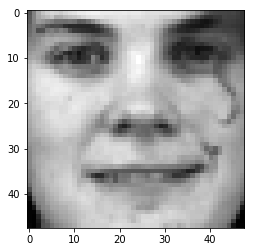

In [95]:
x = random.randint(0, np.shape(image)[0])
q = np.asarray(data[x], dtype=float)
print(label[x])
plt.imshow(q, cmap = plt.get_cmap("gray"))